In [54]:
import pandas as pd
import seaborn
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support

In [40]:
info = pd.read_csv('../bone_fracture_data/FracAtlas/dataset.csv')

In [95]:
data_melanoma = pd.read_csv('../bone_fracture_results/bone_fracture_frac_3.csv')
data_normal = pd.read_csv('../bone_fracture_results/bone_fracture_nofrac_3.csv')

data_melanoma = data_melanoma.assign(truth = np.ones(len(data_melanoma['filename'])))
data_normal = data_normal.assign(truth = np.zeros(len(data_normal['filename'])))

data_list = [data_melanoma, data_normal]

data = pd.concat(data_list, ignore_index=True)


In [96]:

data['result'].replace(['B.','A.'], [0,1], inplace=True)
data['result'].replace(['B','A'], [0,1], inplace=True)
data['result'].replace(['B)','A)'], [0,1], inplace=True)
# data = data.drop(['filename'], axis=1)

for x in data['result']:
    if x != 0 and x != 1:
        data['result'].replace([x], [None], inplace=True)
data = data.dropna()

# data = data['result'].astype(int)
data.result
# for x in data['truth']:
#     if type(x) != int:
#         print(x)



0      1
1      0
2      1
3      1
4      1
      ..
995    1
996    0
997    1
998    1
999    1
Name: result, Length: 1000, dtype: int64

In [97]:
(data.result == 0).sum()

373

In [98]:
(data.result == 1).sum()

627

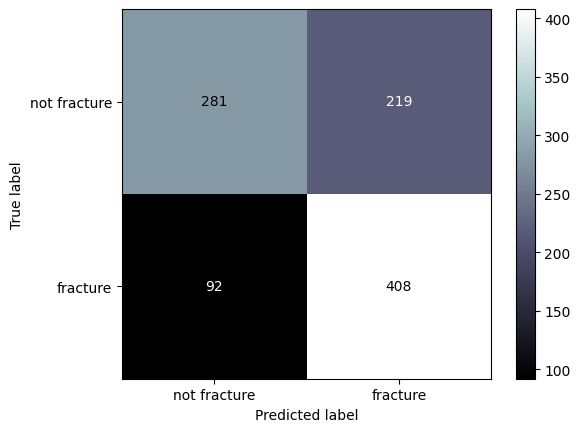

In [99]:
confusion_matrix = metrics.confusion_matrix(data['truth'], data['result'])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["not fracture", "fracture"])
cm_display.plot(cmap='bone')
plt.show()



In [100]:
F1 = metrics.f1_score(data['truth'],data['result'], average='binary')
recall = metrics.recall_score(data['truth'],data['result'], average='binary')
precision = metrics.precision_score(data['truth'],data['result'], average='binary')
accuracy = metrics.accuracy_score(data['truth'],data['result'])

print("Accuracy: ", accuracy)
print("F1: ", F1)
print("Recall: ", recall)
print("Precision: ", precision)

Accuracy:  0.689
F1:  0.7240461401952084
Recall:  0.816
Precision:  0.6507177033492823


In [103]:
data.to_csv('../bone_fracture_results/prep_bone_frac_3.csv')

In [104]:
len(data)

1000

In [101]:
info_data = []

for i in data.filename:
    if (info.image_id == i).any() and (info[(info.image_id == i)].mixed != 1).any():
        info_data.append(info[(info.image_id == i)])

In [102]:
len(info_data)

897

In [82]:
info_bone = (pd.concat(info_data))

In [83]:
len(info_bone.index)

897

In [84]:
print('Number of hand images: ', (info_bone.hand == 1).sum())
print('Number of leg images: ', (info_bone.leg == 1).sum())
print('Number of hip images: ', (info_bone.hip == 1).sum())
print('Number of shoulder images: ', (info_bone.shoulder == 1).sum())
print('Number of mixed images: ', (info_bone.mixed == 1).sum())

Number of hand images:  372
Number of leg images:  462
Number of hip images:  44
Number of shoulder images:  19
Number of mixed images:  0


In [85]:
372+462+44+19

897